# Notebook with datetime methods

#### Explore Capital-Onebike dataset (2017 Q4) from data.world

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rides = pd.read_csv('https://query.data.world/s/wgsnsk2czzssrmxxyffuzbrqkjseft')

In [3]:
rides.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,197068,10/1/2017 12:00,10/1/2017 12:03,31214,17th & Corcoran St NW,31229,New Hampshire Ave & T St NW,W21022,Member
1,434934,10/1/2017 12:00,10/1/2017 12:07,31104,Adams Mill & Columbia Rd NW,31602,Park Rd & Holmead Pl NW,W00470,Member
2,955437,10/1/2017 12:00,10/1/2017 12:16,31221,18th & M St NW,31103,16th & Harvard St NW,W20206,Member
3,461619,10/1/2017 12:00,10/1/2017 12:08,31111,10th & U St NW,31102,11th & Kenyon St NW,W21014,Member
4,3357184,10/1/2017 12:00,10/1/2017 12:56,31260,23rd & E St NW,31260,23rd & E St NW,W22349,Casual


In [4]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815370 entries, 0 to 815369
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Duration (ms)         815370 non-null  int64 
 1   Start date            815370 non-null  object
 2   End date              815370 non-null  object
 3   Start station number  815370 non-null  int64 
 4   Start station         815370 non-null  object
 5   End station number    815370 non-null  int64 
 6   End station           815370 non-null  object
 7   Bike number           815370 non-null  object
 8   Member type           815370 non-null  object
dtypes: int64(3), object(6)
memory usage: 56.0+ MB


In [5]:
rides['Start date'].iloc[2]

'10/1/2017 12:00'

### Note the dates are imported as Dtype "object" - which is a string
In order to import these columns as datetime we can use the "parse_dates" key with a list of columns on import

In [6]:
rides = pd.read_csv('https://query.data.world/s/wgsnsk2czzssrmxxyffuzbrqkjseft',
                   parse_dates = ['Start date', 'End date'])

In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815370 entries, 0 to 815369
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Duration (ms)         815370 non-null  int64         
 1   Start date            815370 non-null  datetime64[ns]
 2   End date              815370 non-null  datetime64[ns]
 3   Start station number  815370 non-null  int64         
 4   Start station         815370 non-null  object        
 5   End station number    815370 non-null  int64         
 6   End station           815370 non-null  object        
 7   Bike number           815370 non-null  object        
 8   Member type           815370 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 56.0+ MB


In [8]:
rides['Start date'].iloc[2]

Timestamp('2017-10-01 12:00:00')

### Note that this is no longer a string of dtype "object" but rather a datetime64[ns] object

### Alternatively we could use:
```
ride['Start date'] = pd.to_datetime(rides['Start date'], format="%Y-%m-%d %H:%M:%S")
```

## Perform Timezone-aware arithmetic

In [9]:
rides['Duration'] = rides['End date'] - rides['Start date']

In [10]:
rides['Duration'].head()

0   0 days 00:03:00
1   0 days 00:07:00
2   0 days 00:16:00
3   0 days 00:08:00
4   0 days 00:56:00
Name: Duration, dtype: timedelta64[ns]

Note: the result is a timedelta object
In oder to convert it to a time we can use the 'total_seconds()' method of dt (dt is datetime package built into Pandas)

In [11]:
rides['Duration_sec'] = rides.Duration.dt.total_seconds()

In [12]:
rides['Duration_sec'].head()

0     180.0
1     420.0
2     960.0
3     480.0
4    3360.0
Name: Duration_sec, dtype: float64

This could have been done in one line as well using method chaining:
```python
rides['Duration_sec'] = (rides['End date'] - rides['Start date']).dt.total_seconds()
```

In [13]:
rides['Duration'].sum()

Timedelta('3106 days 16:10:00')

In [14]:
rides['Member type'].value_counts()

Member    640792
Casual    174578
Name: Member type, dtype: int64

In [15]:
rides['Member type'].value_counts() / len(rides)

Member    0.785891
Casual    0.214109
Name: Member type, dtype: float64

In [16]:
time_elapsed = rides['End date'].max() - rides['Start date'].min()

In [17]:
time_elapsed

Timedelta('92 days 11:19:00')

In [18]:
membertype_duration = rides.groupby('Member type')['Duration_sec'].mean()

<AxesSubplot:xlabel='Member type'>

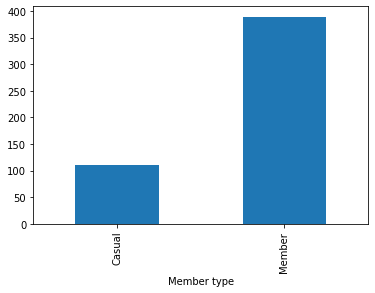

In [19]:
membertype_duration.plot(kind='bar')

<AxesSubplot:xlabel='Member type', ylabel='Duration_sec'>

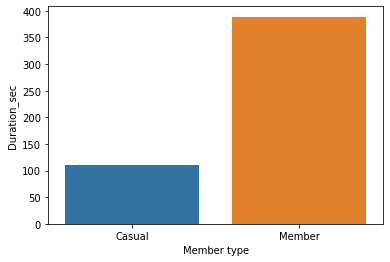

In [20]:
sns.barplot(x=membertype_duration.index, y=membertype_duration)

In [21]:
monthly_rides = rides.resample('M', on='Start date')['Duration_sec'].mean()

<AxesSubplot:xlabel='Start date', ylabel='Duration_sec'>

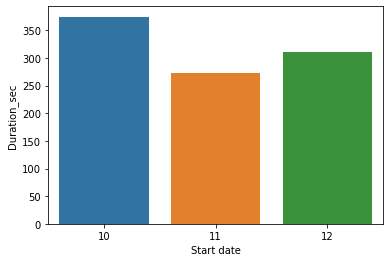

In [22]:
sns.barplot(x=monthly_rides.index.month, y=monthly_rides)

Alternatively just add .plot() to end of chained expression

<AxesSubplot:xlabel='Start date'>

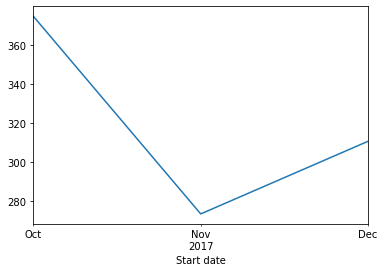

In [23]:
rides.resample('M', on='Start date')['Duration_sec'].mean().plot()

<AxesSubplot:xlabel='Start date'>

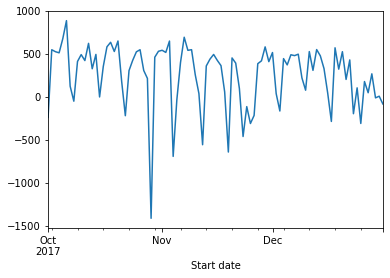

In [24]:
rides.resample('D', on='Start date')['Duration_sec'].mean().plot()

In [25]:
membertype_size = rides.groupby('Member type').size()

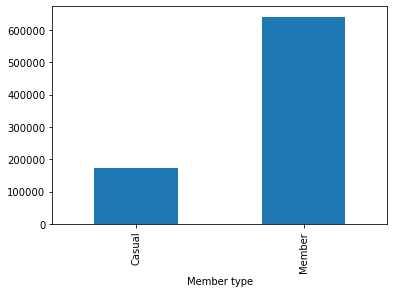

In [26]:
membertype_size = rides.groupby('Member type').size().plot(kind='bar')

In [27]:
joyrides = (rides['Start station'] == rides['End station'])

In [28]:
print(f"There were {joyrides.sum()} joyrides")

There were 24880 joyrides


In [29]:
rides['Duration_sec'].median()

600.0

In [30]:
rides[joyrides]['Duration_sec'].median()

1380.0

In [31]:
rides.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration,Duration_sec
0,197068,2017-10-01 12:00:00,2017-10-01 12:03:00,31214,17th & Corcoran St NW,31229,New Hampshire Ave & T St NW,W21022,Member,0 days 00:03:00,180.0
1,434934,2017-10-01 12:00:00,2017-10-01 12:07:00,31104,Adams Mill & Columbia Rd NW,31602,Park Rd & Holmead Pl NW,W00470,Member,0 days 00:07:00,420.0
2,955437,2017-10-01 12:00:00,2017-10-01 12:16:00,31221,18th & M St NW,31103,16th & Harvard St NW,W20206,Member,0 days 00:16:00,960.0
3,461619,2017-10-01 12:00:00,2017-10-01 12:08:00,31111,10th & U St NW,31102,11th & Kenyon St NW,W21014,Member,0 days 00:08:00,480.0
4,3357184,2017-10-01 12:00:00,2017-10-01 12:56:00,31260,23rd & E St NW,31260,23rd & E St NW,W22349,Casual,0 days 00:56:00,3360.0


In [32]:
onebike = rides['Bike number'] == 'W20529'

In [33]:
df = rides[onebike]

<AxesSubplot:xlabel='Start date'>

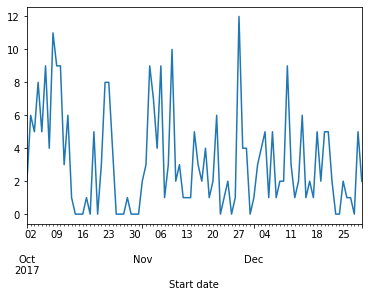

In [34]:
df.resample('D',on='Start date').size().plot()

<AxesSubplot:xlabel='Start date'>

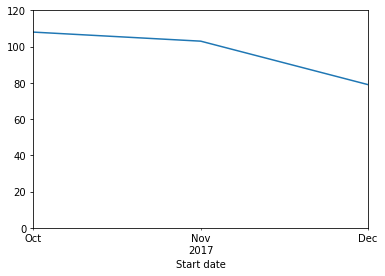

In [35]:
df.resample('M', on='Start date').size().plot(ylim=[0,120])

In [36]:
df.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration,Duration_sec
6728,181612,2017-10-01 03:23:00,2017-10-01 03:26:00,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,0 days 00:03:00,180.0
7090,7622139,2017-10-01 03:42:00,2017-10-01 05:49:00,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,0 days 02:07:00,7620.0
12408,342238,2017-10-02 06:37:00,2017-10-02 06:42:00,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,0 days 00:05:00,300.0
14691,1277204,2017-10-02 08:56:00,2017-10-02 09:18:00,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,0 days 00:22:00,1320.0
21970,1277070,2017-10-02 06:23:00,2017-10-02 06:45:00,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,0 days 00:22:00,1320.0


In [37]:
monthly_rides = df.resample('M',on='Start date')['Member type']

In [38]:
monthly_rides_pct = monthly_rides.value_counts() / monthly_rides.size()

In [39]:
print(monthly_rides_pct)

Start date  Member type
2017-10-31  Member         0.675926
            Casual         0.324074
2017-11-30  Member         0.776699
            Casual         0.223301
2017-12-31  Member         0.835443
            Casual         0.164557
Name: Member type, dtype: float64


In [40]:
grouped = rides.groupby('Member type').resample('M',on='Start date').agg({'Duration_sec':'median'})

In [41]:
grouped['Duration_sec']

Member type  Start date
Casual       2017-10-31    1260.0
             2017-11-30    1200.0
             2017-12-31    1080.0
Member       2017-10-31     540.0
             2017-11-30     540.0
             2017-12-31     540.0
Name: Duration_sec, dtype: float64

## Let's look at the smallest ride duration

In [42]:
df['Duration'].dt.total_seconds().min()

-42360.0

In [43]:
rides['Duration'].describe()

count                       815370
mean     0 days 00:05:29.196070495
std      0 days 02:05:45.621270716
min              -1 days +12:01:00
25%                0 days 00:06:00
50%                0 days 00:10:00
75%                0 days 00:18:00
max                1 days 11:00:00
Name: Duration, dtype: object

This is obviously quirky that the .min() returns a negative value
The time is "naive" so we need to use timezones to correct for Daylight savings time issues

In [44]:
rides['Start date'].dt.tz_localize('America/New_York')

AmbiguousTimeError: Cannot infer dst time from 2017-11-05 01:00:00, try using the 'ambiguous' argument

This throws an ambiguous time error code because we have two dates with exactly the same time from when we "Fall back" and repeat the same time
To deal with this we use and argument in the tz_localize()

In [45]:
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')

In [46]:
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')

Now that the times are fixed we need to recalculate the 'Duration' and 'Duration_sec' columns

In [47]:
rides['Duration'] = rides['End date'] - rides['Start date']

In [48]:
rides['Duration'].head()

0   0 days 00:03:00
1   0 days 00:07:00
2   0 days 00:16:00
3   0 days 00:08:00
4   0 days 00:56:00
Name: Duration, dtype: timedelta64[ns]

In [49]:
rides['Duration_sec'] = rides['Duration'].dt.total_seconds()

In [50]:
rides['Duration'].min()

Timedelta('-1 days +12:01:00')

<AxesSubplot:xlabel='Start date'>

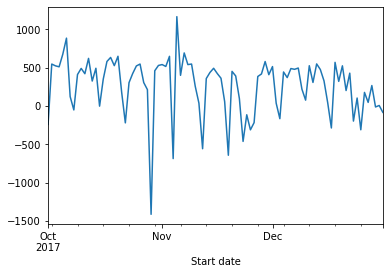

In [51]:
rides.resample('D', on='Start date')['Duration_sec'].mean().plot()

In [52]:
rides['Duration'].describe()

count                       814638
mean     0 days 00:05:37.197822836
std      0 days 02:05:26.224746109
min              -1 days +12:01:00
25%                0 days 00:06:00
50%                0 days 00:10:00
75%                0 days 00:18:00
max                1 days 11:10:00
Name: Duration, dtype: object

In [53]:
df['Start date'] = df['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df['End date'] = df['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now that the times are fixed we need to recalculate the 'Duration' and 'Duration_sec' columns

In [55]:
df['Duration'] = df['End date'] - df['Start date']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df['Duration'].head()

6728    0 days 00:03:00
7090    0 days 02:07:00
12408   0 days 00:05:00
14691   0 days 00:22:00
21970   0 days 00:22:00
Name: Duration, dtype: timedelta64[ns]

In [57]:
df['Duration_sec'] = df['Duration'].dt.total_seconds()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df['Duration'].min()

Timedelta('-1 days +12:14:00')

<AxesSubplot:xlabel='Start date'>

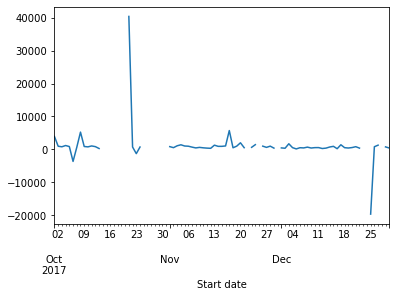

In [59]:
df.resample('D', on='Start date')['Duration_sec'].mean().plot()

In [60]:
df['Duration'].describe()

count                          289
mean     0 days 00:17:24.498269896
std      0 days 02:46:09.899585796
min              -1 days +12:14:00
25%                0 days 00:06:00
50%                0 days 00:11:00
75%                0 days 00:18:00
max                1 days 09:22:00
Name: Duration, dtype: object